In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
LOC = '/home/tom/Dropbox/data/ML/TimeSeries/'
FILE = 'temps.csv'

In [3]:
COLS = ["Date", "Temp"]
df = pd.read_csv(LOC+FILE, usecols=COLS)

In [4]:
df["Temp"] = pd.to_numeric(df["Temp"], errors='coerce', downcast=None)
df = df.dropna()

series = pd.Series(data=df["Temp"])

/home/tom/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


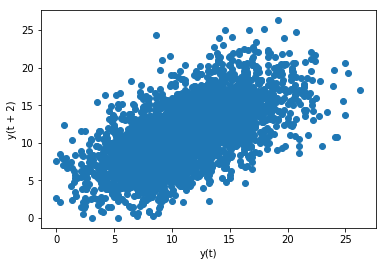

In [6]:
pd.tools.plotting.lag_plot(series, lag=2)
plt.show()

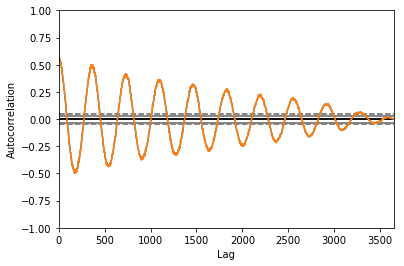

In [8]:
pd.plotting.autocorrelation_plot(series)
plt.show()

In [14]:
results = []
for lag in range(1,730):
    N = len(series)-lag
    start = series[0:N].reset_index()
    stop  = series[lag:].reset_index()
    del(start["index"])
    del(stop["index"])
    c = round(start.corrwith(stop),2)
    r = (lag,c[0])
    results.append(r)

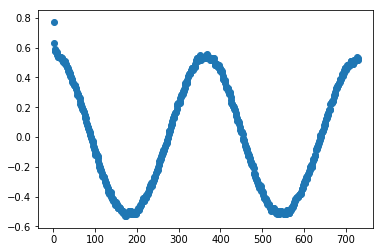

In [15]:
X = [x[0] for x in results]
Y = [x[1] for x in results]

plt.scatter(X,Y)
plt.show()

In [16]:
Y

[0.77,
 0.63,
 0.59,
 0.58,
 0.58,
 0.58,
 0.57,
 0.57,
 0.56,
 0.55,
 0.54,
 0.54,
 0.54,
 0.54,
 0.54,
 0.54,
 0.53,
 0.54,
 0.53,
 0.53,
 0.53,
 0.52,
 0.51,
 0.5,
 0.5,
 0.51,
 0.51,
 0.5,
 0.49,
 0.48,
 0.49,
 0.47,
 0.47,
 0.47,
 0.46,
 0.44,
 0.43,
 0.44,
 0.43,
 0.42,
 0.41,
 0.4,
 0.4,
 0.39,
 0.38,
 0.37,
 0.36,
 0.36,
 0.35,
 0.35,
 0.35,
 0.34,
 0.34,
 0.33,
 0.32,
 0.3,
 0.28,
 0.28,
 0.29,
 0.28,
 0.27,
 0.27,
 0.26,
 0.24,
 0.22,
 0.22,
 0.21,
 0.2,
 0.19,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17,
 0.15,
 0.13,
 0.14,
 0.13,
 0.1,
 0.09,
 0.08,
 0.07,
 0.06,
 0.06,
 0.05,
 0.04,
 0.03,
 0.02,
 0.01,
 0.0,
 -0.01,
 -0.02,
 -0.03,
 -0.03,
 -0.04,
 -0.06,
 -0.07,
 -0.08,
 -0.09,
 -0.11,
 -0.12,
 -0.11,
 -0.11,
 -0.12,
 -0.12,
 -0.13,
 -0.14,
 -0.16,
 -0.18,
 -0.2,
 -0.2,
 -0.21,
 -0.22,
 -0.23,
 -0.22,
 -0.24,
 -0.26,
 -0.26,
 -0.26,
 -0.27,
 -0.27,
 -0.27,
 -0.29,
 -0.3,
 -0.31,
 -0.31,
 -0.32,
 -0.33,
 -0.33,
 -0.34,
 -0.35,
 -0.37,
 -0.36,
 -0.38,
 -0.38,
 -0.37,
 -0.37,
 -0.39